In [1]:
import numpy as np

In [2]:
import matplotlib.pyplot as plt

In [3]:
input_vector= [1.72, 1.23]

In [4]:
weights_1 = [1.26, 0]
weights_2= [2.17, 0.32]

In [5]:
#computing the dot of input_vector and weighs_1
first_indexes_mult= input_vector[0] * weights_1[0]
second_indexes_mult= input_vector[1] * weights_1[1]
dot_product_1= first_indexes_mult + second_indexes_mult
print(f"The dot product is: {dot_product_1}")

The dot product is: 2.1672


In [6]:
dot_product_1 = np.dot(input_vector, weights_1)
print(dot_product_1)
dot_product_2= np.dot(input_vector, weights_2)
print(dot_product_2)

2.1672
4.1259999999999994


In [7]:
#wrapping the vectors in numpy arrays
input_vector= np.array([1.66, 1.56])
weights_1= np.array([1.45, -0.66])
bias= np.array([0.0])

In [8]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [9]:
def make_prediction(input_vector, weights, bias):
    layer_1= np.dot(input_vector, weights)+ bias
    layer_2= sigmoid(layer_1)
    return layer_2

In [10]:
prediction = make_prediction(input_vector, weights_1, bias)

In [11]:
print(f"prediction is: {prediction}")

prediction is: [0.7985731]


In [12]:
input_vector= np.array([2, 1.5])
prediction= make_prediction(input_vector, weights_1, bias)

In [13]:
print(prediction)

[0.87101915]


In [14]:
target = 0
mse= np.square(prediction - target)

In [15]:
print(f'prediction:{prediction}; error: {mse}')
derivative= 2*(prediction- target)
print(f'the derivative is: {derivative}')

prediction:[0.87101915]; error: [0.75867436]
the derivative is: [1.7420383]


In [16]:
#updating the weights
weights_1= weights_1- derivative
prediction= make_prediction(input_vector, weights_1, bias)
error= (prediction- target)**2

In [17]:
print(f'prediction: {prediction}; error {error}')

prediction: [0.01496248]; error [0.00022388]


In [18]:
def sigmoid_deriv(x):sigmoid(x)* (1-sigmoid(x))

In [19]:
def sigmoid_deriv(x):
    return sigmoid(x)* (1-sigmoid(x))

In [20]:
derror_dprediction= 2* (prediction-target)
layer_1= np.dot(input_vector, weights_1)+ bias
dprediction_dlayer1= sigmoid_deriv(layer_1)
dlayer1_dbias= 1

In [21]:
derror_dbias= (derror_dprediction * dprediction_dlayer1 * dlayer1_dbias)

In [34]:
class NeuralNetwork:
    def __init__(self, learning_rate):
        self.weights = np.array([np.random.randn(), np.random.randn()])
        self.bias = np.random.randn()
        self.learning_rate = learning_rate

    def _sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def _sigmoid_deriv(self, x):
        return self._sigmoid(x) * (1 - self._sigmoid(x))

    def predict(self, input_vector):
        layer_1 = np.dot(input_vector, self.weights) + self.bias
        layer_2 = self._sigmoid(layer_1)
        prediction = layer_2
        return prediction

    def _compute_gradients(self, input_vector, target):
        layer_1 = np.dot(input_vector, self.weights) + self.bias
        layer_2 = self._sigmoid(layer_1)
        prediction = layer_2

        derror_dprediction = 2 * (prediction - target)
        dprediction_dlayer1 = self._sigmoid_deriv(layer_1)
        dlayer1_dbias = 1
        dlayer1_dweights = (0 * self.weights) + (1 * input_vector)

        derror_dbias = (
            derror_dprediction * dprediction_dlayer1 * dlayer1_dbias
        )
        derror_dweights = (
            derror_dprediction * dprediction_dlayer1 * dlayer1_dweights
        )

        return derror_dbias, derror_dweights

    def _update_parameters(self, derror_dbias, derror_dweights):
        self.bias = self.bias - (derror_dbias * self.learning_rate)
        self.weights = self.weights - (
            derror_dweights * self.learning_rate
        )
    def train(self, input_vectors, targets, iterations):
        cumulative_errors=[]
        for current_iteration in range(iterations):
            
            #pick a data instance at random
            random_data_index= np.random.randint(len(input_vectors))
            
            input_vector= input_vectors[random_data_index]
            target= targets[random_data_index]
            
            #compute the gradients and update the weights_1
            derror_dbias, derror_dweights= self._compute_gradients(
                input_vector, target
            )

            self._update_parameters(derror_dbias, derror_dweights)

            # measure the cumulative error for all the instances
            if current_iteration % 100 == 0:
                cumulative_error = 0
                
                #loop through all the instances to measure the error
                for data_instance_index in range(len(input_vectors)):
                    data_point= input_vectors[data_instance_index]
                    target= targets[data_instance_index]

                    prediction= self.predict(data_point)
                    error= np.square(prediction - target)

                    cumulative_error= cumulative_error + error
                cumulative_errors.append(cumulative_error)
        return cumulative_errors

In [36]:
learning_rate= 0.1
neural_network= NeuralNetwork(learning_rate)

In [37]:
neural_network.predict(input_vector)

0.04770142333959873

In [38]:
print(neural_network.predict(input_vector))

0.04770142333959873


In [39]:
input_vectors= np.array([[3,1.5], [2,1], [4,1.5], [3,4], [3.5,0.5], [2,0.5], [5.5,1], [1,1],])

In [40]:
targets= np.array([0,1,0,1,0,1,1,0])

In [41]:
learning_rate= 0.1

In [42]:
neural_network= NeuralNetwork(learning_rate)

In [43]:
training_error = neural_network.train(input_vectors, targets, 10000)

In [44]:
learning_rate=0.1

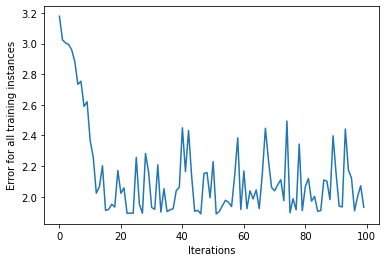

In [45]:
plt.plot(training_error)
plt.xlabel('Iterations')
plt.ylabel('Error for all training instances')
plt.savefig('cumulative_error.png')